In [253]:
import os, shutil
import pathlib
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'


import matplotlib.pyplot as plt
import numpy as np


import tensorflow as tf
from tensorflow import keras


In [254]:
physical_devices = tf.config.list_physical_devices('GPU')

In [255]:
print("Num GPUs:", len(physical_devices))

Num GPUs: 1


In [256]:
base_dir = '/home/kailash/VScode Python projects/tf/conv/small_dataset1/'

In [257]:
train_dir = os.path.join(base_dir,'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')

In [258]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [259]:
AUTOTUNE = tf.data.AUTOTUNE

In [260]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,batch_size=None,image_size=(150,150))

Found 15000 files belonging to 2 classes.


In [261]:
train_ds

<ShuffleDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [262]:
val_ds = tf.keras.utils.image_dataset_from_directory(validation_dir,batch_size=None,image_size=(150,150))

Found 5000 files belonging to 2 classes.


In [263]:
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir,batch_size=30,image_size=(150,150))

Found 5000 files belonging to 2 classes.


In [264]:
train_ds

<ShuffleDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [265]:
# image= tf.image.per_image_standardization(image)


In [266]:


# _ = plt.imshow(np.array(image))


In [267]:
train_ds

<ShuffleDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [268]:
# IMG_SIZE = 150
def normalize(image):
   return tf.image.per_image_standardization(image)


In [269]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.Resizing(150,150),
  tf.keras.layers.RandomRotation(40),
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomTranslation(.2,.2),
  tf.keras.layers.RandomZoom(.2),
  tf.keras.layers.RandomHeight(.2),
  tf.keras.layers.RandomWidth(.2)
])

In [270]:
train_ds

<ShuffleDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [271]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(150, 150, 3)
()


In [272]:
train_ds


<ShuffleDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [273]:
# def optimise_aug(ds,shuffle=False,augment=False):
#     ds = ds.map(lambda x, y: (normalize(x), y),num_parallel_calls=AUTOTUNE)

#     if shuffle:
#         ds = ds.shuffle(1000)


    
#     if augment:
#         ds = ds.map(lambda x,y : (data_augmentation(x),y),num_parallel_calls=AUTOTUNE)
    
#     return ds.cache().prefetch(buffer_size=AUTOTUNE).batch(30)


In [274]:
def aug(ds,augment=False):
    ds = ds.map(lambda x, y: (normalize(x), y),num_parallel_calls=AUTOTUNE)

    if augment:
        ds = ds.map(lambda x,y : (data_augmentation(x),y),num_parallel_calls=AUTOTUNE)
    
    return ds.batch(30)

In [275]:
train_ds =aug(train_ds,augment=True)
val_ds = aug(val_ds)



In [276]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [277]:
image,label = next(iter(train_ds))

In [278]:
from datetime import datetime
logdir = "logs/train_data/" + datetime.now().strftime("%Y%m%d-%H%M%S")

file_writer = tf.summary.create_file_writer(logdir)
with file_writer.as_default():
    tf.summary.image("Training data", image, step=0)

    

    
    

In [279]:
# image, label = next(iter(train_ds))


# _ = plt.imshow(np.array(image))

In [280]:
val_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [281]:

test_ds = test_ds.map(lambda x, y: (normalize(x), y))

In [282]:
test_ds

<MapDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [283]:
# image, label = next(iter(test_ds))


# _ = plt.imshow(np.array(image))

In [284]:
active = tf.keras.activations.relu
initial = tf.keras.initializers.he_uniform

In [285]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Conv2D(32,(3,3),padding = "same",activation="relu",input_shape=(150,150,3)))
# model.add(tf.keras.layers.MaxPooling2D((2,2)))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Conv2D(64, (3, 3),padding = "same", activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D((2, 2)))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = "same",activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D((2, 2)))
# model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = "same",activation='relu'))
# model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(128, activation='relu'))
# model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [286]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Conv2D(32,(3,3),padding = "same",activation=active,input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))


model.add(tf.keras.layers.Conv2D(64, (3, 3),padding = "same", activation=active))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = "same",activation=active))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = "same",activation=active))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation=active,kernel_regularizer=keras.regularizers.l1_l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(128,activation=active,kernel_regularizer=keras.regularizers.l1_l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())


model.add(tf.keras.layers.Dense(64,activation=active,kernel_regularizer=keras.regularizers.l1_l2(0.01)))



model.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid))


In [287]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 37, 37, 64)      

In [288]:

model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Nadam(learning_rate=.001),metrics='acc')

In [289]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("cats_dog_classifier",save_best_only=True)

In [290]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [291]:
# root_logdir = os.path.join(os.curdir, "my_logs")
# def get_run_logdir():
#     import time
#     run_id = "fullmodel_BN_Nadam_regularizationl1_l2_fulldata"
#     return os.path.join(root_logdir, run_id)


# run_logdir = get_run_logdir()


In [292]:

tensorboard_cb = tf.keras.callbacks.TensorBoard(logdir,profile_batch='10,20',write_images=True,write_graph=True,histogram_freq=1) 

In [293]:
history = model.fit(train_ds,epochs=1,validation_data=val_ds,callbacks=[tensorboard_cb])

500/500 [==============================] - 34s 58ms/step - loss: 12.5409 - acc: 0.6255 - val_loss: 4.2456 - val_acc: 0.7108


In [294]:
test_ds

<MapDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [295]:
model.evaluate(test_ds)

167/167 [==============================] - 3s 17ms/step - loss: 4.2445 - acc: 0.7218


[4.244490146636963, 0.7218000292778015]

In [296]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [297]:
import pandas as pd
import matplotlib.pyplot as plt

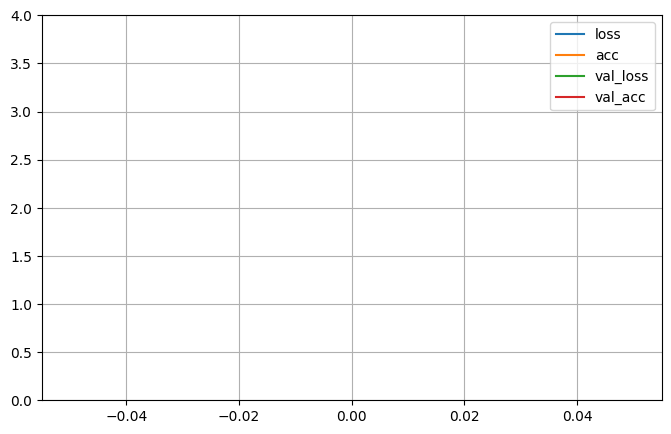

In [298]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 4) # set the vertical range to [0-1]
plt.show()

In [308]:
# Load the TensorBoard notebook extension
%reload_ext tensorboard


In [309]:
%tensorboard  --logdir=./logs/train_data

In [310]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances


Known TensorBoard instances:
  - port 6007: logdir ./logs (started 0:00:56 ago; pid 73962)
  - port 6006: logdir ./my_logs (started 0:03:09 ago; pid 70306)
  - port 6008: logdir ./logs/train_data (started 0:00:01 ago; pid 75414)


In [311]:
notebook.display(port=6008, height=1000)


Selecting TensorBoard with logdir ./logs/train_data (started 0:00:19 ago; port 6008, pid 75414).
